In [1]:
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make('Blackjack-v1')

In [3]:
def generate_act_episode(pi):
    
    episode=[]
    S0=env.reset()
    
    while(S0[0]<12):
        S0= env.reset()
        
    state= S0
    A0= np.random.choice([0,1], p=[0.5,0.5])
    
    action= A0
    done= False
    
    while(done!=True):
        
        next_state, reward, done, info= env.step(action)
        
        sar= (state,action,reward)
        episode.append(sar)
        
        state= next_state
        
        if(next_state[0]<=21):
            action= int(pi[state[1]-1][state[0]-12]) #(Dealer's card, Player Sum)
            
        else:
            break

    return episode

# GENERATE OPTIMUM POLICIES

## USABLE ACE

In [4]:
pi= np.ones((10,10))
q= np.zeros((10,10,2))
n= np.zeros((10,10,2))

counter= 500000
while(counter>0):
    episode= generate_act_episode(pi)
    
    if(episode[0][0][2]==True):
        G=0
        counter-=1
   
        for t in range(len(episode)):
            state= episode[t][0]
            player_sum= state[0]-12
            dealer_card= state[1]-1
            reward= episode[t][2]
            action= episode[t][1]
            G=G+reward
            
            q[dealer_card][player_sum][action]= (G+(q[dealer_card][player_sum][action]* n[dealer_card][player_sum][action]))/(n[dealer_card][player_sum][action]+1)
            
            pi[dealer_card][player_sum]= np.argmax(q[dealer_card][player_sum])
    

## NO USABLE ACE 

In [5]:
pi1= np.ones((10,10))
q= np.zeros((10,10,2))
n= np.zeros((10,10,2))

counter= 500000
while(counter>0):
    episode= generate_act_episode(pi1)
    
    if(episode[0][0][2]==False):
        G=0
        counter-=1
   
        for t in range(len(episode)):
            state= episode[t][0]
            player_sum= state[0]-12
            dealer_card= state[1]-1
            reward= episode[t][2]
            action= episode[t][1]
            G=G+reward
            
            q[dealer_card][player_sum][action]= (G+(q[dealer_card][player_sum][action]* n[dealer_card][player_sum][action]))/(n[dealer_card][player_sum][action]+1)
            
            pi1[dealer_card][player_sum]= np.argmax(q[dealer_card][player_sum])
    

# EVALUATE THE POLICIES

In [6]:
def action_from_policy(state, pi):
    
    dealers_card= state[1]-1
    player_sum= state[0]-12
    
    return(int(pi[dealers_card][player_sum]))
    

In [7]:
def generate_episode(pi):
    
    episode=[]
    S0=env.reset()
    
    while(S0[0]<12):
        S0= env.reset()
        
    state= S0
    done= False
    
    while(done!=True):
        
        action= action_from_policy(state,pi)
        next_state, reward, done, info= env.step(action)
        
        sar= (state,action,reward)
        episode.append(sar)
        
        state= next_state

    return episode

## USABLE ACE

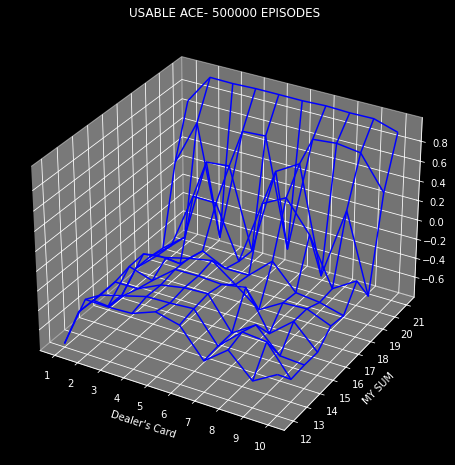

In [8]:
#Find the value of the policy
#USABLE ACE CASE
def a_mc_every_visit(counter):
    
    S_mean= np.zeros((10,10))
    S_count=np.zeros((10,10))


    while (True):
        
        episode= generate_episode(pi)
        
        if(episode[0][0][2]==True and counter>0):
            
            counter-=1

            t= len(episode)-1
            G=0

            while(t>=0):
                G= G + episode[t][2]

                state= episode[t][0]

                
                x= state[1]-1 #x axis is dealer's card
                y= state[0]-12 #y axis is my sum


                S_mean[x][y]=  ( (S_mean[x][y]*S_count[x][y]) + G) / (S_count[x][y]+1)
                S_count[x][y]+=1

                t=t-1
                
        if(counter==0):
            break
            
        
        
    v=S_mean
    return v

v= a_mc_every_visit(500000)

my_sum=[12,13,14,15,16,17,18,19,20,21]
dealers_card= [1,2,3,4,5,6,7,8,9,10]
Y,X= np.meshgrid(my_sum, dealers_card)

plt.style.use('dark_background')

#No Usable Ace

plt.style.use('dark_background')

fig = plt.figure(0,figsize=(8,8))
ax= plt.axes(projection='3d')
plt.title('USABLE ACE- 500000 EPISODES')
ax.set_xlabel("Dealer's Card")
ax.set_ylabel("MY SUM")
ax.set_xticks(dealers_card)
ax.set_yticks(my_sum)
ax.plot_wireframe(X, Y, v, color='blue')


# NO USABLE ACE

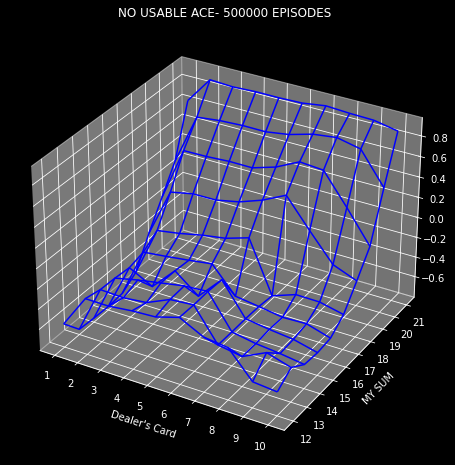

In [9]:
#Find the value of the policy
#NO USABLE ACE CASE
def na_mc_every_visit(counter):
    
    S_mean= np.zeros((10,10))
    S_count=np.zeros((10,10))


    while (True):
        
        episode= generate_episode(pi1)
        
        if(episode[0][0][2]==False and counter>0):
            
            counter-=1

            t= len(episode)-1
            G=0

            while(t>=0):
                G= G + episode[t][2]

                state= episode[t][0]

                
                x= state[1]-1 #x axis is dealer's card
                y= state[0]-12 #y axis is my sum


                S_mean[x][y]=  ( (S_mean[x][y]*S_count[x][y]) + G) / (S_count[x][y]+1)
                S_count[x][y]+=1

                t=t-1
                
        if(counter==0):
            break
            
        
        
    v=S_mean
    return v

v= na_mc_every_visit(500000)

my_sum=[12,13,14,15,16,17,18,19,20,21]
dealers_card= [1,2,3,4,5,6,7,8,9,10]
Y,X= np.meshgrid(my_sum, dealers_card)

plt.style.use('dark_background')

#No Usable Ace

plt.style.use('dark_background')

fig = plt.figure(0,figsize=(8,8))
ax= plt.axes(projection='3d')
plt.title('NO USABLE ACE- 500000 EPISODES')
ax.set_xlabel("Dealer's Card")
ax.set_ylabel("MY SUM")
ax.set_xticks(dealers_card)
ax.set_yticks(my_sum)
ax.plot_wireframe(X, Y, v, color='blue')


In [13]:
pi #Optimum Usable Ace Policy

array([[0., 1., 1., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 1., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0., 1., 0., 0.]])

In [12]:
pi1 #Optimum No Usable Ace Policy

array([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])